In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human/train')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human/validation')

zip_ref.close()

In [3]:
base_dir = '/tmp/horse-or-human'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_horse_dir = os.path.join(train_dir, 'horse')
train_human_dir = os.path.join(train_dir, 'human')

validation_horse_dir = os.path.join(validation_dir, 'horse')
validation_human_dir = os.path.join(validation_dir, 'human')

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')        
])

model.compile(
    optimizer=RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=100,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/5
8/8 [==============================] - 23s 3s/step - loss: 0.6894 - accuracy: 0.5584 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 24s 3s/step - loss: 0.6739 - accuracy: 0.6051 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 25s 3s/step - loss: 0.6503 - accuracy: 0.6585 - val_loss: 0.7615 - val_accuracy: 0.5000
Epoch 4/5
8/8 [==============================] - 24s 3s/step - loss: 0.6215 - accuracy: 0.6885 - val_loss: 0.6273 - val_accuracy: 0.5664
Epoch 5/5
8/8 [==============================] - 24s 3s/step - loss: 0.5819 - accuracy: 0.7264 - val_loss: 0.6009 - val_accuracy: 0.6133


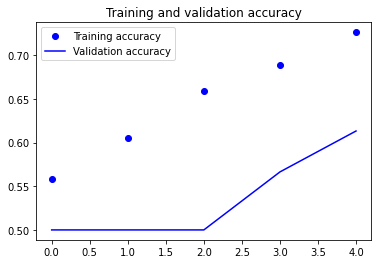

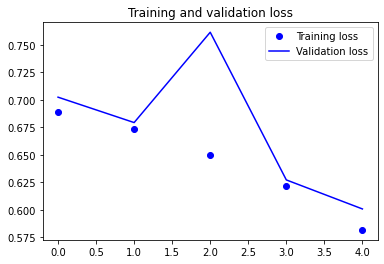

In [10]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()